In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras

Epoch 1/5
844/844 [==============================] - 50s 58ms/step - loss: 0.5663 - accuracy: 0.7916 - val_loss: 0.3980 - val_accuracy: 0.8535
Epoch 2/5
844/844 [==============================] - 47s 56ms/step - loss: 0.3625 - accuracy: 0.8689 - val_loss: 0.3335 - val_accuracy: 0.8755
Epoch 3/5
844/844 [==============================] - 46s 55ms/step - loss: 0.3117 - accuracy: 0.8854 - val_loss: 0.3007 - val_accuracy: 0.8917
Epoch 4/5
844/844 [==============================] - 48s 57ms/step - loss: 0.2777 - accuracy: 0.8984 - val_loss: 0.2767 - val_accuracy: 0.8993
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 0.2899 - accuracy: 0.8972
Test accuracy: 0.8971999883651733
313/313 [==============================] - 3s 8ms/step


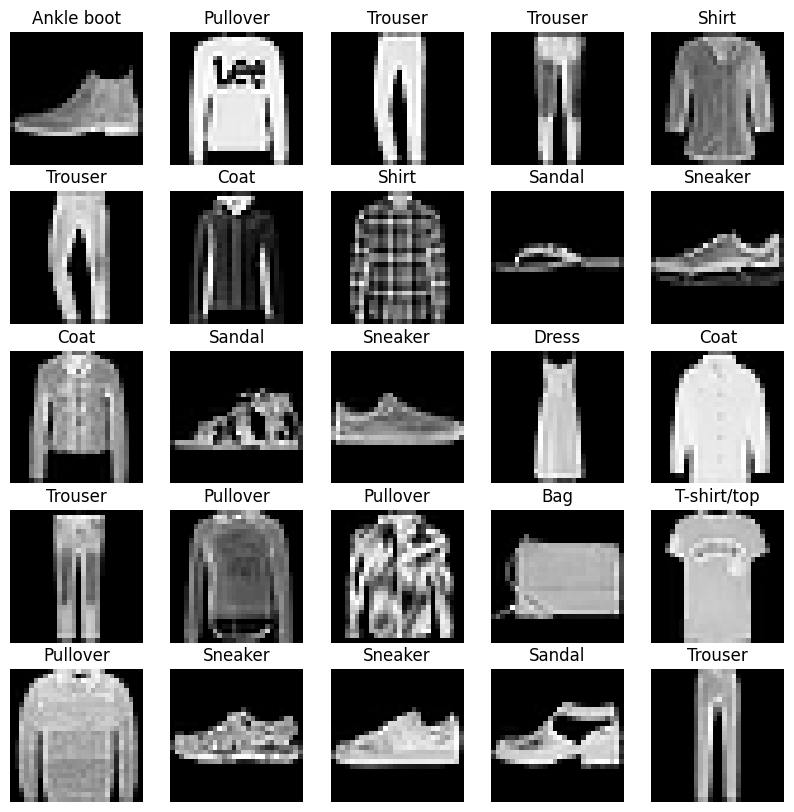

In [ ]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the pixel values to the range [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Convert labels to one-hot encoded vectors
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Define the model architecture
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape the input images to match the Conv2D input shape
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

# Predict labels for test images
predictions = model.predict(test_images)

# Plot images along with predicted labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(class_names[np.argmax(predictions[i])])
    plt.axis('off')
plt.show()
